# Problem - 1: Getting Started with Data Exploration - Some Warm up


Dataset **Overview**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1) Load the dataset and display the first 10 rows

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Assignment - 1/ WHR-2024-5CS037.csv')
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
#2) Identify the number of rows and columns in the dataset

rows, columns = data.shape
print("Number of rows are:", rows)
print("Number of columns are:", columns)

Number of rows are: 143
Number of columns are: 9


In [ ]:
#3) List all the columns and their data types

data.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**Basic Statistics**

In [ ]:
#1) Calculate the mean, median, and standard deviation for the Score column

import pandas as pd

mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
#2) Identify the country with the highest and lowest happiness scores

max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"The country with the highest happiness score: {max_score_country}")
print(f"The country with the lowest happiness score: {min_score_country}")

The country with the highest happiness score: Finland
The country with the lowest happiness score: Afghanistan


**Missing Values**

In [ ]:
#1) Check for missing values and display the total count for each column

missing_values = data.isnull().sum()

print("Missing values per column are:")
print(missing_values)

Missing values per column are:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filetering and Sorting**

In [ ]:
#1) Filter the dataset to show only countries with a Score greater than 7.5

filtered_data = data[data['score'] > 7.5]
print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
#2)  Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows

sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
top_10_rows = sorted_data.head(10)
print(top_10_rows)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding New COlumns**

In [ ]:
#1) Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
#Low − (Score < 4)
#Medium - (4 ≤ Score ≤ 6)
#High - (Score > 6)

data['Happiness Category'] = pd.cut(data['score'],
                                    bins=[-float('inf'), 4, 6, float('inf')],
                                    labels=['Low', 'Medium', 'High'])
print(data[['Country name', 'score', 'Happiness Category']])


         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


**Data Visualizations**

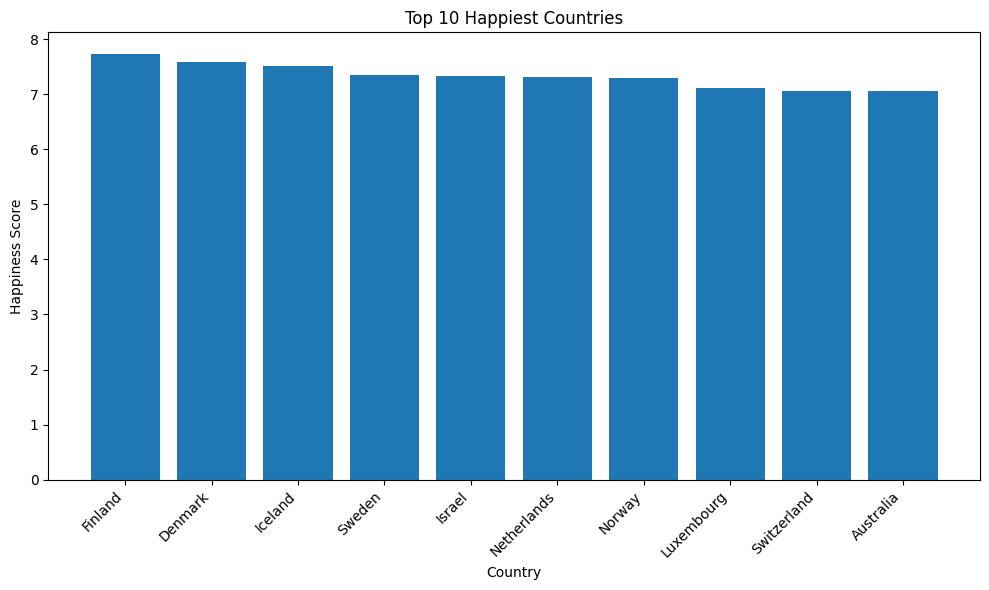

In [ ]:
#Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

top_10_happiest = data.sort_values(by=['score'], ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

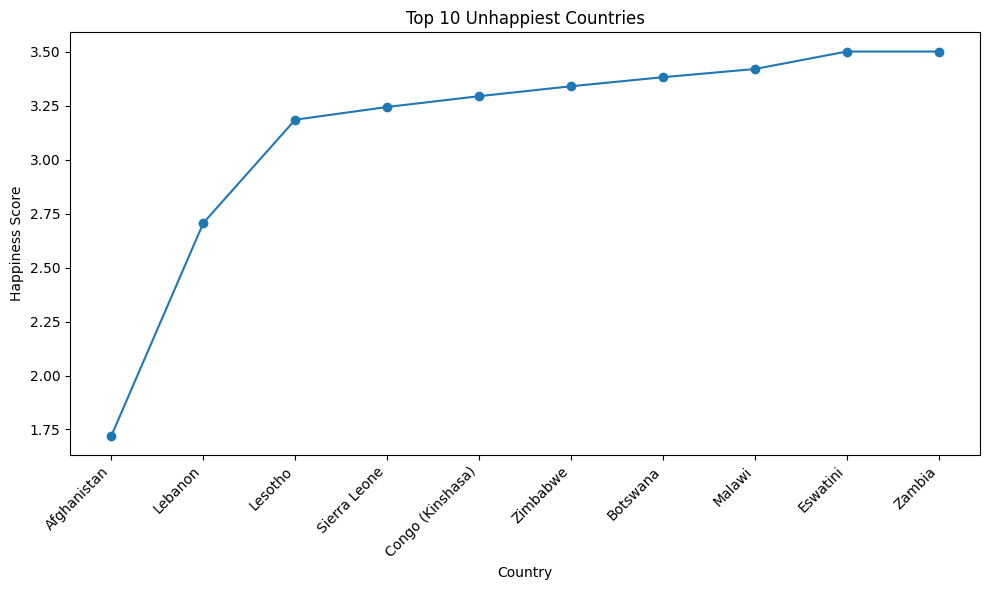

In [ ]:
#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

top_10_unhappiest = data.sort_values(by=['score'], ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Unhappiest Countries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

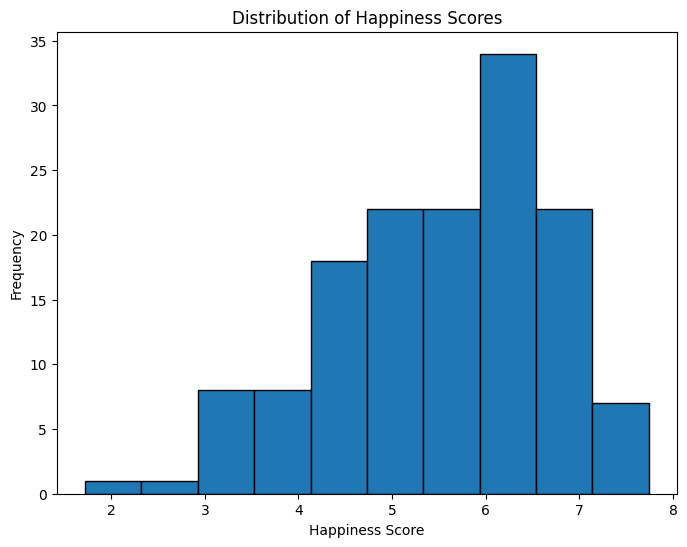

In [ ]:
#Plot a histogram for the Score column to show its distribution and also interpret.

plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=10, edgecolor='black')
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Happiness Scores")
plt.show()

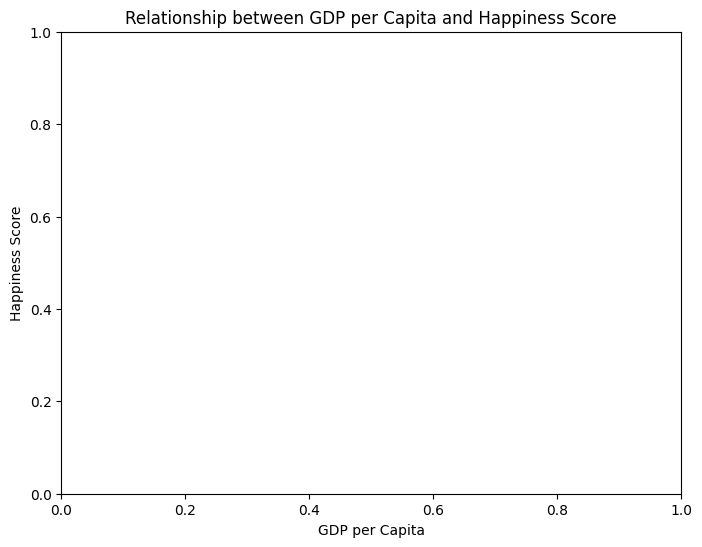

In [ ]:
#Scatter Plot: GDP per Capita vs. Score

plt.figure(figsize=(8, 6))
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Relationship between GDP per Capita and Happiness Score")
plt.show()


# 3.2 Problem - 2 - Some Advance Data Exploration Task:

In [ ]:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:

# 1.) Define the countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2.) Filter the dataset
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# 3.) Save the filtered dataframe as a CSV file
south_asia_data.to_csv('south_asia_data.csv', index=False)



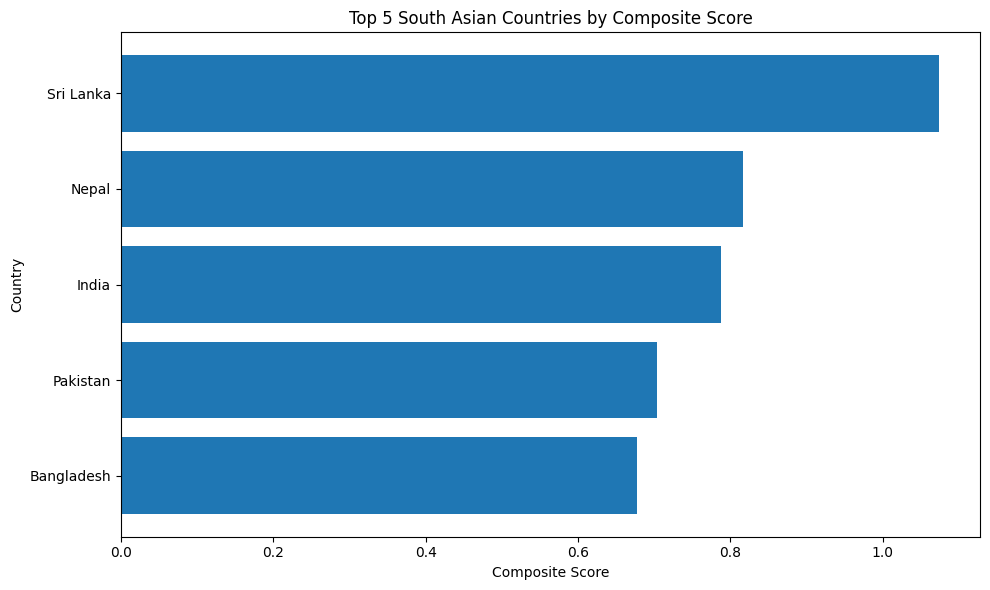

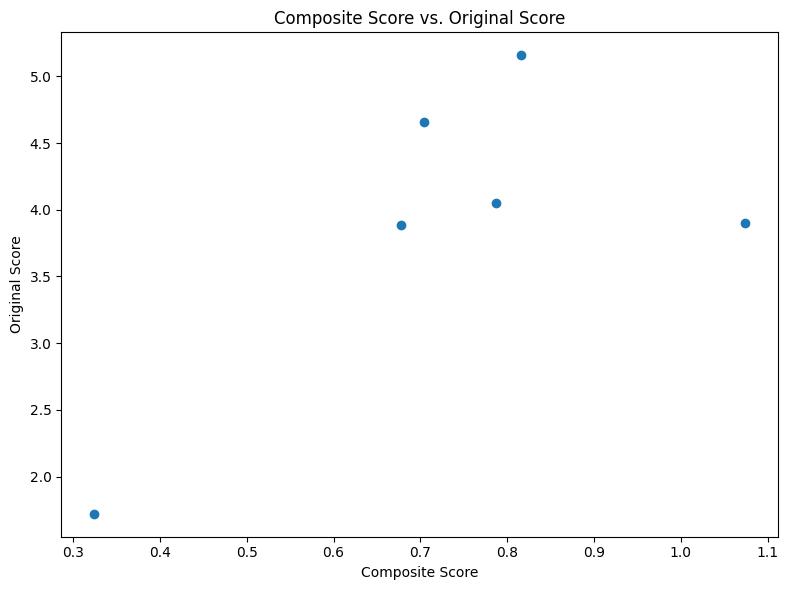

Correlation between Composite Score and Original Score: nan


In [ ]:
#Task - 2 - Composite Score Ranking:

# 1.)Create Composite Score column

south_asia_data_csv = pd.read_csv('/content/south_asia_data.csv')
south_asia_data_csv.head(10)

south_asia_data_csv['Composite Score'] = (
    0.40 * south_asia_data_csv['Log GDP per capita'] +
    0.30 * south_asia_data_csv['Social support'] +
    0.30 * south_asia_data_csv['Healthy life expectancy']
)

# 2. Rank countries based on Composite Score
ranked_countries = south_asia_data_csv.sort_values(by=['Composite Score'], ascending=False)

# 3. Visualize top 5 countries with horizontal bar chart
top_5_countries = ranked_countries.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Compare rankings with original Score
# Plot scatter plot of Composite Score vs. original Score
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data_csv['Composite Score'], south_asia_data['score'])
plt.xlabel("Composite Score")
plt.ylabel("Original Score")
plt.title("Composite Score vs. Original Score")
plt.tight_layout()
plt.show()

# Calculate correlation between Composite Score and original Score
correlation = south_asia_data_csv['Composite Score'].corr(south_asia_data['score'])
print(f"Correlation between Composite Score and Original Score: {correlation}")




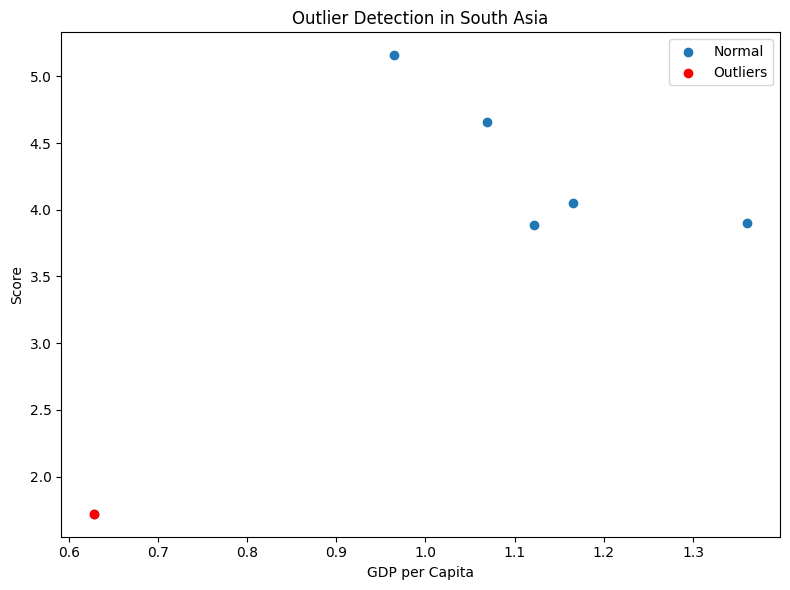

Outlier Countries:
5    Afghanistan
Name: Country name, dtype: object


In [ ]:
#Task - 3 - Outlier Detection:

Q1_score = south_asia_data_csv['score'].quantile(0.25)
Q3_score = south_asia_data_csv['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

Q1_gdp = south_asia_data_csv['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data_csv['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# 2. Identify outliers
outliers_score = south_asia_data_csv[(south_asia_data_csv['score'] < lower_bound_score) | (south_asia_data_csv['score'] > upper_bound_score)]
outliers_gdp = south_asia_data_csv[(south_asia_data_csv['Log GDP per capita'] < lower_bound_gdp) | (south_asia_data_csv['Log GDP per capita'] > upper_bound_gdp)]

outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()


# 3. Create scatter plot with outliers highlighted
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data_csv['Log GDP per capita'], south_asia_data_csv['score'], label='Normal')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.title("Outlier Detection in South Asia")
plt.legend()
plt.tight_layout()
plt.show()

# Print outlier countries
print("Outlier Countries:")
print(outliers['Country name'])


Correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Correlation between Generosity and Score: nan


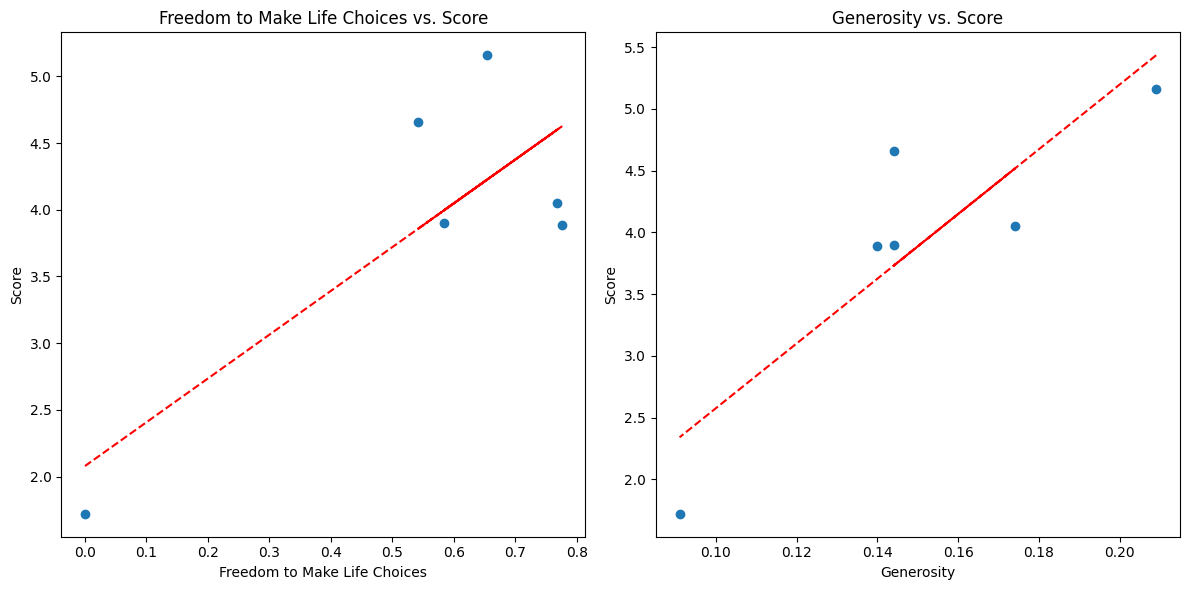

In [ ]:
#Task - 4 - Exploring Trends Across Metrics

# 1. Calculate correlations
correlation_freedom = south_asia_data_csv['Freedom to make life choices'].corr(south_asia_data_csv['score'])
correlation_generosity = south_asia_data_csv['Generosity'].corr(south_asia_data['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Correlation between Generosity and Score: {correlation_generosity}")

# 2. Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Freedom to Make Life Choices vs. Score
axes[0].scatter(south_asia_data_csv['Freedom to make life choices'], south_asia_data_csv['score'])
axes[0].set_xlabel("Freedom to Make Life Choices")
axes[0].set_ylabel("Score")
axes[0].set_title("Freedom to Make Life Choices vs. Score")

# Add trendline
z = np.polyfit(south_asia_data_csv['Freedom to make life choices'], south_asia_data_csv['score'], 1)
p = np.poly1d(z)
axes[0].plot(south_asia_data_csv['Freedom to make life choices'], p(south_asia_data_csv['Freedom to make life choices']), "r--")

# Scatter plot for Generosity vs. Score
axes[1].scatter(south_asia_data_csv['Generosity'], south_asia_data_csv['score'])
axes[1].set_xlabel("Generosity")
axes[1].set_ylabel("Score")
axes[1].set_title("Generosity vs. Score")

# Add trendline
z = np.polyfit(south_asia_data_csv['Generosity'], south_asia_data['score'], 1)
p = np.poly1d(z)
axes[1].plot(south_asia_data_csv['Generosity'], p(south_asia_data['Generosity']), "r--")

plt.tight_layout()
plt.show()

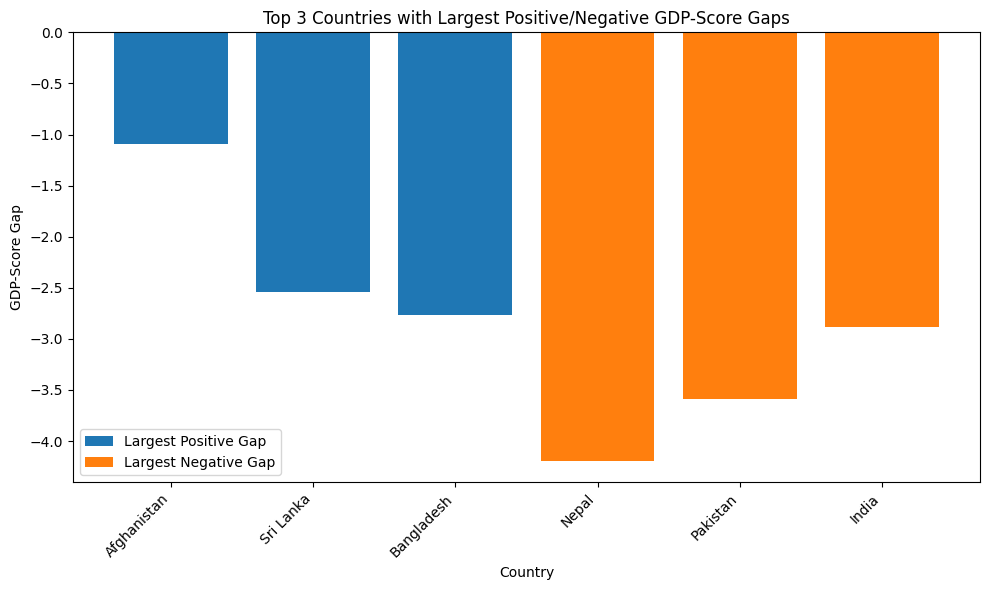

In [ ]:
#Task - 5 - Gap Analysis

# 1. Add GDP-Score Gap column
south_asia_data_csv['GDP-Score Gap'] = south_asia_data_csv['Log GDP per capita'] - south_asia_data_csv['score']

# 2. Rank countries by gap
ranked_ascending = south_asia_data_csv.sort_values(by=['GDP-Score Gap'], ascending=True)
ranked_descending = south_asia_data_csv.sort_values(by=['GDP-Score Gap'], ascending=False)

# 3. Highlight top 3 countries with largest positive/negative gaps
top_3_positive = ranked_descending.head(3)
top_3_negative = ranked_ascending.head(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'], label='Largest Positive Gap')
plt.bar(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], label='Largest Negative Gap')
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.title("Top 3 Countries with Largest Positive/Negative GDP-Score Gaps")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# 3.3 Problem - 3 - Comparative Analysis:

In [ ]:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset

# 1. Define the countries in the Middle East
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# 2. Filter the dataset
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# 3. (Optional) Save the filtered dataframe as a separate CSV file for future use
middle_east_data.to_csv('middle_east_data.csv', index=False)

**Descriptive Statistics**

In [ ]:
# Calculate mean and standard deviation of Score for South Asia
south_asia_mean_score = south_asia_data_csv['score'].mean()
south_asia_std_score = south_asia_data_csv['score'].std()

# Calculate mean and standard deviation of Score for Middle East
middle_east_mean_score = middle_east_data['score'].mean()
middle_east_std_score = middle_east_data['score'].std()

# Print the results
print(f"South Asia - Mean Score: {south_asia_mean_score:.2f}, Standard Deviation: {south_asia_std_score:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean_score:.2f}, Standard Deviation: {middle_east_std_score:.2f}")

# Compare average happiness scores
if south_asia_mean_score > middle_east_mean_score:
    print("South Asia has higher happiness scores on average.")
elif middle_east_mean_score > south_asia_mean_score:
    print("Middle East has higher happiness scores on average.")
else:
    print("Both regions have the same average happiness score.")

South Asia - Mean Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has higher happiness scores on average.


**Top and Bottom Performers**

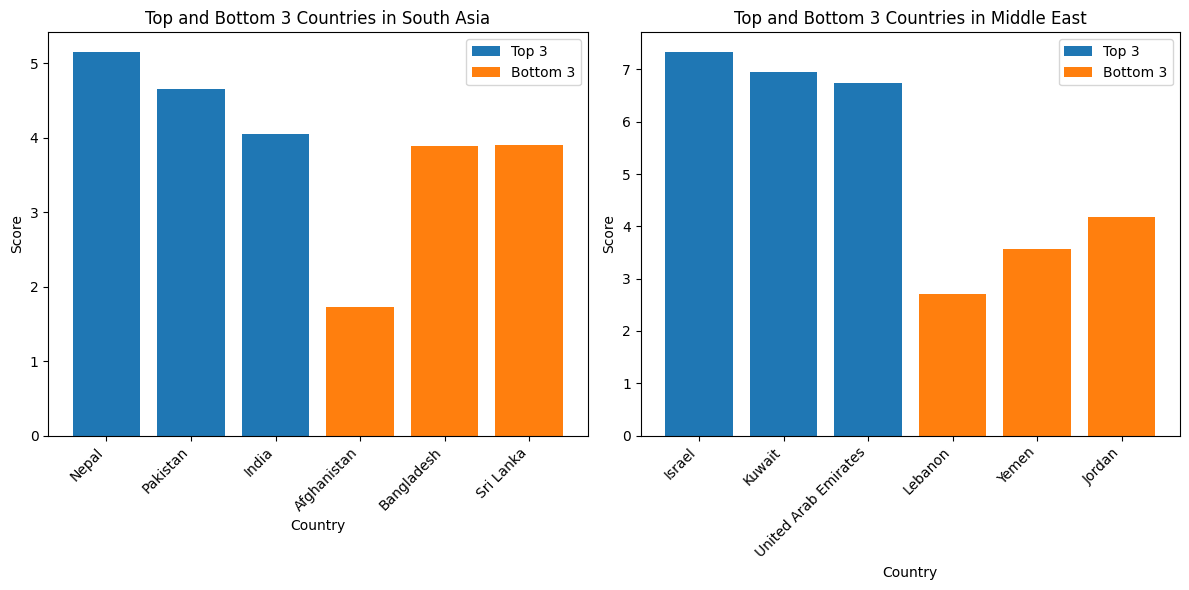

In [ ]:
# Top 3 and bottom 3 countries in South Asia
south_asia_top3 = south_asia_data_csv.sort_values(by=['score'], ascending=False).head(3)
south_asia_bottom3 = south_asia_data_csv.sort_values(by=['score'], ascending=True).head(3)

# Top 3 and bottom 3 countries in Middle East
middle_east_top3 = middle_east_data.sort_values(by=['score'], ascending=False).head(3)
middle_east_bottom3 = middle_east_data.sort_values(by=['score'], ascending=True).head(3)

# Plot bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(south_asia_top3['Country name'], south_asia_top3['score'], label='Top 3')
axes[0].bar(south_asia_bottom3['Country name'], south_asia_bottom3['score'], label='Bottom 3')
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Score")
axes[0].set_title("Top and Bottom 3 Countries in South Asia")
axes[0].legend()

plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

# Middle East bar chart
axes[1].bar(middle_east_top3['Country name'], middle_east_top3['score'], label='Top 3')
axes[1].bar(middle_east_bottom3['Country name'], middle_east_bottom3['score'], label='Bottom 3')
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Score")
axes[1].set_title("Top and Bottom 3 Countries in Middle East")
axes[1].legend()

plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Metric Comparisons**

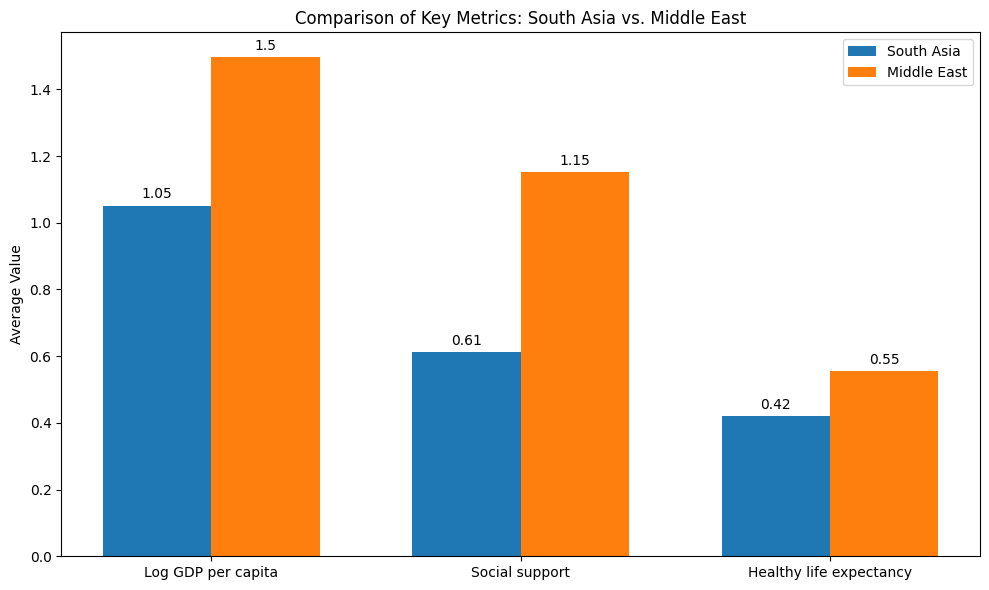

The metric with the largest disparity between the two regions is: Social support


In [ ]:
# 1. Select key metrics for comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# 2. Calculate the average values for each metric in both regions
south_asia_means = south_asia_data_csv[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# 3. Create a grouped bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, south_asia_means, width, label='South Asia')
rects2 = ax.bar(x + width/2, middle_east_means, width, label='Middle East')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Key Metrics: South Asia vs. Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# 4. Identify metrics with largest disparity
disparity = abs(south_asia_means - middle_east_means)
largest_disparity_metric = disparity.idxmax()
print(f"The metric with the largest disparity between the two regions is: {largest_disparity_metric}")

**Happiness Disparity**

In [ ]:
# 1. Compute range and coefficient of variation (CV) for Score
def range_and_cv(data, column):
    """Calculates the range and coefficient of variation for a given column."""
    data_range = data[column].max() - data[column].min()
    cv = (data[column].std() / data[column].mean()) * 100
    return data_range, cv

south_asia_range, south_asia_cv = range_and_cv(south_asia_data_csv, 'score')
middle_east_range, middle_east_cv = range_and_cv(middle_east_data, 'score')

# 2. Print the results
print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}%")

# 3. Identify the region with greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
elif middle_east_cv > south_asia_cv:
    print("Middle East has greater variability in happiness scores.")
else:
    print("Both regions have the same variability in happiness scores.")

South Asia - Range: 3.44, Coefficient of Variation: 30.21%
Middle East - Range: 4.63, Coefficient of Variation: 28.94%
South Asia has greater variability in happiness scores.


**Correlation Analaysis**

Correlation Analysis for South Asia:
Correlation between Score and Freedom to make life choices: 0.80
Correlation between Score and Generosity: 0.87

Correlation Analysis for Middle East:
Correlation between Score and Freedom to make life choices: 0.86
Correlation between Score and Generosity: 0.63


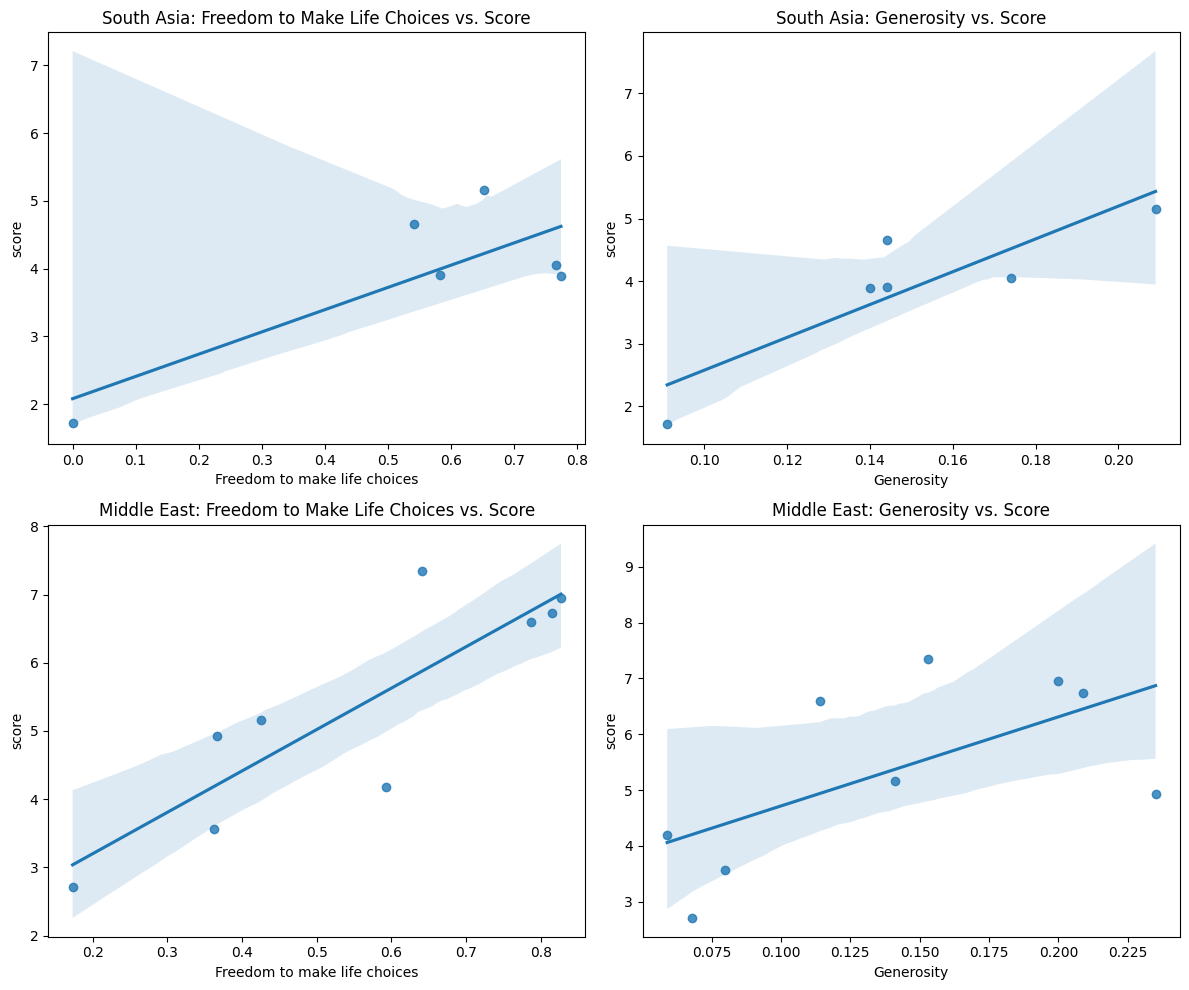

In [ ]:
# 1. Define the metrics for correlation analysis
metrics_for_correlation = ['Freedom to make life choices', 'Generosity']

# 2. Calculate and print correlations for South Asia
print("Correlation Analysis for South Asia:")
for metric in metrics_for_correlation:
    correlation = south_asia_data_csv['score'].corr(south_asia_data_csv[metric])
    print(f"Correlation between Score and {metric}: {correlation:.2f}")

# 3. Calculate and print correlations for Middle East
print("\nCorrelation Analysis for Middle East:")
for metric in metrics_for_correlation:
    correlation = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation between Score and {metric}: {correlation:.2f}")

# 4. Create scatter plots with trendlines using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns for plots

# South Asia scatter plots
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data_csv, ax=axes[0, 0])
axes[0, 0].set_title("South Asia: Freedom to Make Life Choices vs. Score")

sns.regplot(x='Generosity', y='score', data=south_asia_data_csv, ax=axes[0, 1])
axes[0, 1].set_title("South Asia: Generosity vs. Score")

# Middle East scatter plots
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_data, ax=axes[1, 0])
axes[1, 0].set_title("Middle East: Freedom to Make Life Choices vs. Score")

sns.regplot(x='Generosity', y='score', data=middle_east_data, ax=axes[1, 1])
axes[1, 1].set_title("Middle East: Generosity vs. Score")

plt.tight_layout()
plt.show()

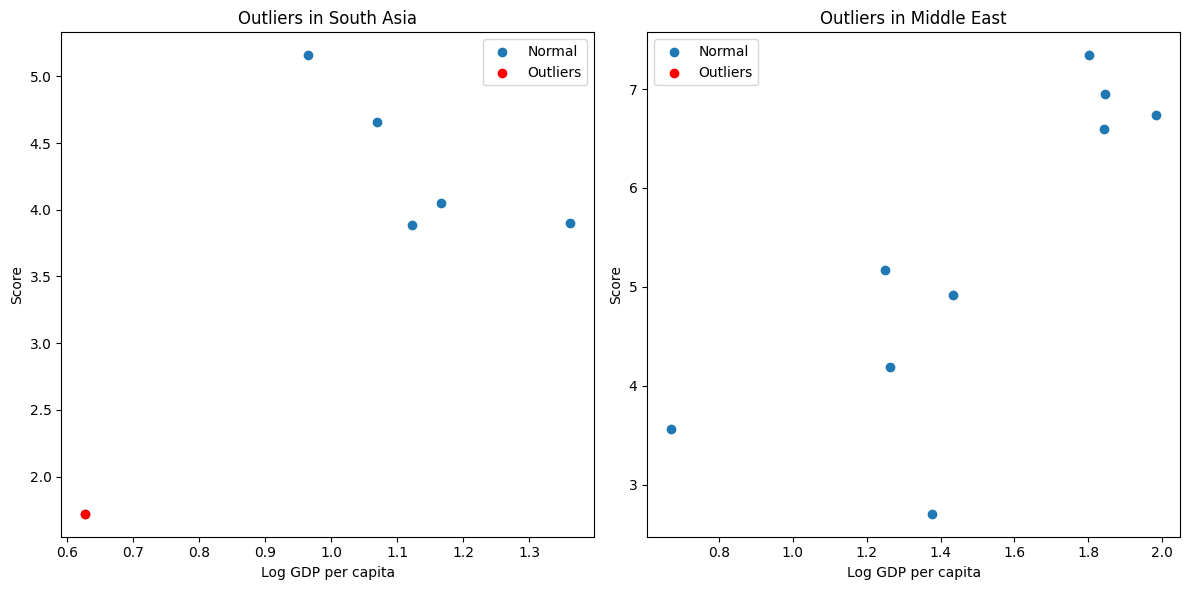

Outlier Countries in South Asia:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Outlier Countries in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []

Implications:
Outliers could indicate countries with unique characteristics or potential data issues.
Further investigation is needed to understand the reasons behind these outliers.


In [ ]:
def find_outliers_iqr(data, column):
    """Identifies outliers using the Interquartile Range (IQR) method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 1. Identify outliers for Score and GDP per capita in South Asia
south_asia_outliers_score = find_outliers_iqr(south_asia_data_csv, 'score')
south_asia_outliers_gdp = find_outliers_iqr(south_asia_data_csv, 'Log GDP per capita')

# 2. Identify outliers for Score and GDP per capita in Middle East
middle_east_outliers_score = find_outliers_iqr(middle_east_data, 'score')
middle_east_outliers_gdp = find_outliers_iqr(middle_east_data, 'Log GDP per capita')

# 3. Combine outliers from both metrics for each region
south_asia_outliers = pd.concat([south_asia_outliers_score, south_asia_outliers_gdp]).drop_duplicates()
middle_east_outliers = pd.concat([middle_east_outliers_score, midd  le_east_outliers_gdp]).drop_duplicates()

# 4. Plot outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# South Asia outlier plot
axes[0].scatter(south_asia_data_csv['Log GDP per capita'], south_asia_data_csv['score'], label='Normal')
axes[0].scatter(south_asia_outliers['Log GDP per capita'], south_asia_outliers['score'], color='red', label='Outliers')
axes[0].set_xlabel("Log GDP per capita")
axes[0].set_ylabel("Score")
axes[0].set_title("Outliers in South Asia")
axes[0].legend()

# Middle East outlier plot
axes[1].scatter(middle_east_data['Log GDP per capita'], middle_east_data['score'], label='Normal')
axes[1].scatter(middle_east_outliers['Log GDP per capita'], middle_east_outliers['score'], color='red', label='Outliers')
axes[1].set_xlabel("Log GDP per capita")
axes[1].set_ylabel("Score")
axes[1].set_title("Outliers in Middle East")
axes[1].legend()

plt.tight_layout()
plt.show()

# 5. Discuss implications (print outlier countries and potential reasons)
print("Outlier Countries in South Asia:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nOutlier Countries in Middle East:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nImplications:")
print("Outliers could indicate countries with unique characteristics or potential data issues.")
print("Further investigation is needed to understand the reasons behind these outliers.")

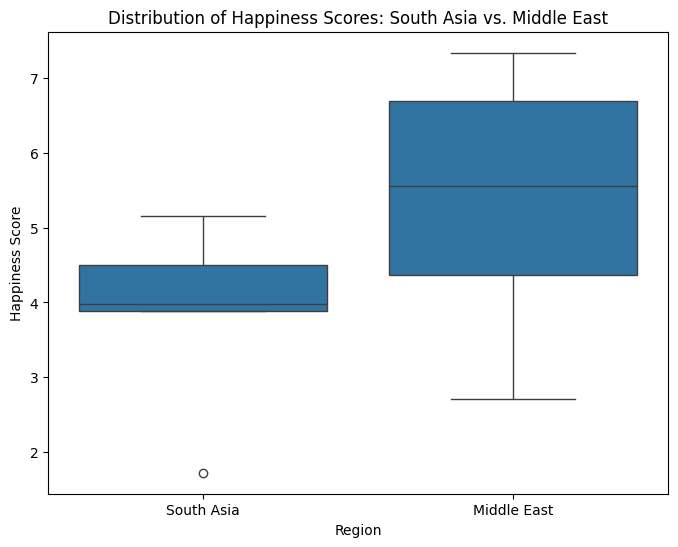

Interpretation:
- **Median:** The median happiness score in the Middle East appears to be slightly higher than in South Asia.
- **Distribution Shape:** The distribution of scores in South Asia seems to be slightly more spread out (wider IQR) compared to the Middle East.
- **Outliers:** There are potential outliers in both regions, indicating countries with unusually high or low happiness scores.
- **Overall:** While the median scores are relatively close, the differences in distribution shape and outliers suggest some variations in happiness levels within each region.


In [ ]:
# 1. Create a combined DataFrame for both regions
combined_data = pd.concat([
    south_asia_data_csv[['Country name', 'score']].assign(Region='South Asia'),
    middle_east_data[['Country name', 'score']].assign(Region='Middle East')
])

# 2. Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=combined_data)
plt.title("Distribution of Happiness Scores: South Asia vs. Middle East")
plt.ylabel("Happiness Score")
plt.show()

# 3. Interpretation
print("Interpretation:")
print("- **Median:** The median happiness score in the Middle East appears to be slightly higher than in South Asia.")
print("- **Distribution Shape:** The distribution of scores in South Asia seems to be slightly more spread out (wider IQR) compared to the Middle East.")
print("- **Outliers:** There are potential outliers in both regions, indicating countries with unusually high or low happiness scores.")
print("- **Overall:** While the median scores are relatively close, the differences in distribution shape and outliers suggest some variations in happiness levels within each region.")